## <center> <font color='purple'> Comparison Diagram - DES with Single ML Models</font></center> 
#### <center>Firuz Juraev (Sungkyunkwan Unniversity)</center>

#### <center><font color='red'> Keywords: Single, DES, Mortality Prediction, Classification, Comparison, Barchart, Critical Diagram </font></center>

In [5]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re
import numpy as np 
sns.set()

#### <font color='blue'>Libraries for Critical Diagram 

In [6]:
from sklearn.model_selection import StratifiedKFold
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
from Orange.evaluation import compute_CD, graph_ranks
from sklearn.metrics import mean_absolute_error

### <font color='purple'>Load Results 

In [7]:
des_3_models_results = pd.read_csv("single_pool_results/des_single_pool_results_3_models.csv")
des_4_models_results = pd.read_csv("single_pool_results/des_single_pool_results_4_models.csv")
des_5_models_results = pd.read_csv("single_pool_results/des_single_pool_results_5_models.csv")
des_6_models_results = pd.read_csv("single_pool_results/des_single_pool_results_6_models.csv")

In [8]:
def remove_rows(df): 
    indexNames = df[(df['method'] == 'FIRE-MCB') | (df['method'] == 'MCB')].index
    df.drop(indexNames , inplace=True)
    return df 

In [9]:
des_3_models_results = remove_rows(des_3_models_results)
des_4_models_results = remove_rows(des_4_models_results)
des_5_models_results = remove_rows(des_5_models_results)
des_6_models_results = remove_rows(des_6_models_results)

In [10]:
des_3_models_results.describe().T

,count,mean,std,min,25%,50%,75%,max
accuracy,12.0,0.951500,0.007514,0.939,0.94475,0.9530,0.95825,0.960
accuracy_std,12.0,0.002167,0.000937,0.001,0.00200,0.0020,0.00200,0.005
precision,12.0,0.911750,0.012585,0.891,0.90050,0.9145,0.92350,0.926
precision_std,12.0,0.003833,0.001115,0.003,0.00300,0.0040,0.00400,0.007
recall,12.0,1.000000,0.000000,1.000,1.00000,1.0000,1.00000,1.000
recall_std,12.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
f1_score,12.0,0.953667,0.006867,0.942,0.94775,0.9550,0.96025,0.961
f1_std,12.0,0.002083,0.000669,0.001,0.00200,0.0020,0.00200,0.004
auc,12.0,0.983583,0.002392,0.977,0.98275,0.9850,0.98500,0.985
auc_std,12.0,0.000500,0.000674,0.000,0.00000,0.0000,0.00100,0.002


In [11]:
des_4_models_results.describe().T

,count,mean,std,min,25%,50%,75%,max
accuracy,12.0,0.952833,0.022045,0.920,0.92575,0.9650,0.96900,0.972
accuracy_std,12.0,0.001583,0.000793,0.001,0.00100,0.0010,0.00200,0.003
precision,12.0,0.930833,0.013327,0.908,0.91875,0.9345,0.94125,0.947
precision_std,12.0,0.002667,0.001435,0.001,0.00175,0.0025,0.00325,0.005
recall,12.0,0.978000,0.032496,0.934,0.93400,1.0000,1.00000,1.000
recall_std,12.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
f1_score,12.0,0.953833,0.022045,0.921,0.92675,0.9660,0.97000,0.973
f1_std,12.0,0.001417,0.000793,0.000,0.00100,0.0010,0.00200,0.003
auc,12.0,0.969000,0.030552,0.904,0.96900,0.9830,0.98625,0.987
auc_std,12.0,0.000667,0.000651,0.000,0.00000,0.0010,0.00100,0.002


In [12]:
des_5_models_results.describe().T

,count,mean,std,min,25%,50%,75%,max
accuracy,12.0,0.963250,0.016327,0.940,0.95325,0.963,0.97375,0.987
accuracy_std,12.0,0.004250,0.006151,0.000,0.00100,0.001,0.00400,0.018
precision,12.0,0.950167,0.016900,0.924,0.93800,0.947,0.96525,0.975
precision_std,12.0,0.002000,0.000853,0.001,0.00100,0.002,0.00300,0.003
recall,12.0,0.978250,0.034449,0.914,0.97250,1.000,1.00000,1.000
recall_std,12.0,0.007083,0.013208,0.000,0.00000,0.000,0.00525,0.036
f1_score,12.0,0.963500,0.017154,0.938,0.95375,0.964,0.97450,0.988
f1_std,12.0,0.004333,0.006499,0.000,0.00075,0.001,0.00425,0.019
auc,12.0,0.968500,0.033116,0.908,0.95750,0.986,0.99125,0.992
auc_std,12.0,0.002083,0.003288,0.000,0.00000,0.000,0.00425,0.009


In [13]:
des_6_models_results.describe().T

,count,mean,std,min,25%,50%,75%,max
accuracy,12.0,0.939250,0.029214,0.890,0.92625,0.9445,0.95425,0.981
accuracy_std,12.0,0.003500,0.005633,0.000,0.00000,0.0010,0.00325,0.014
precision,12.0,0.974417,0.010211,0.960,0.96450,0.9775,0.97925,0.990
precision_std,12.0,0.001500,0.000905,0.000,0.00100,0.0020,0.00200,0.003
recall,12.0,0.902333,0.065358,0.797,0.87025,0.9240,0.92400,1.000
recall_std,12.0,0.006917,0.012760,0.000,0.00000,0.0000,0.00525,0.032
f1_score,12.0,0.935583,0.033113,0.878,0.92225,0.9435,0.95225,0.981
f1_std,12.0,0.004000,0.006523,0.000,0.00000,0.0010,0.00375,0.016
auc,12.0,0.974083,0.034794,0.882,0.98200,0.9885,0.99125,0.994
auc_std,12.0,0.003500,0.008152,0.000,0.00000,0.0000,0.00225,0.028


In [14]:
des_5_models_results

,method,accuracy,accuracy_std,precision,precision_std,recall,recall_std,f1_score,f1_std,auc,auc_std
0,FIRE-KNORA-U,0.971,0.001,0.945,0.002,1.000,0.000,0.972,0.001,0.992,0.000
1,KNORA-U,0.967,0.002,0.938,0.003,1.000,0.000,0.968,0.002,0.992,0.000
2,FIRE-KNORA-E,0.940,0.000,0.964,0.001,0.914,0.000,0.938,0.000,0.908,0.000
3,KNORA-E,0.942,0.000,0.969,0.001,0.914,0.000,0.941,0.000,0.908,0.000
4,FIRE-METADES,0.957,0.014,0.931,0.002,0.987,0.028,0.958,0.014,0.982,0.004
5,METADES,0.942,0.010,0.942,0.003,0.941,0.021,0.941,0.011,0.978,0.005
6,FIRE-DESKNN,0.987,0.001,0.975,0.001,1.000,0.000,0.988,0.001,0.992,0.000
7,DESKNN,0.986,0.001,0.973,0.001,1.000,0.000,0.987,0.000,0.991,0.000
10,FIRE-DESP,0.976,0.001,0.954,0.002,1.000,0.000,0.976,0.001,0.990,0.000
11,DESP,0.973,0.002,0.949,0.003,1.000,0.000,0.974,0.002,0.991,0.000


### <font color='purple'> Bar Chart 

In [15]:
labels = ['3 classifiers', '4 classifiers', '5 classifiers', '6 classifiers']

accuracy_means = [des_3_models_results.accuracy.mean(), 
                  des_4_models_results.accuracy.mean(), 
                  des_5_models_results.accuracy.mean(),
                  des_6_models_results.accuracy.mean(),]

precision_means = [des_3_models_results.precision.mean(), 
                   des_4_models_results.precision.mean(), 
                   des_5_models_results.precision.mean(),
                   des_6_models_results.precision.mean()]

recall_means =   [des_3_models_results.recall.mean(), 
                  des_4_models_results.recall.mean(), 
                  des_5_models_results.recall.mean(),
                  des_6_models_results.recall.mean()]

f1_score_means = [des_3_models_results.f1_score.mean(), 
                  des_4_models_results.f1_score.mean(), 
                  des_5_models_results.f1_score.mean(),
                  des_6_models_results.f1_score.mean()]

auc_score_means = [des_3_models_results.auc.mean(), 
                   des_4_models_results.auc.mean(), 
                   des_5_models_results.auc.mean(),
                   des_6_models_results.auc.mean()]

In [16]:
row_names = ['Accuracy', "Precision", 'Recall', 'F1', 'AUC']

results = {'Number of classifiers': labels, 
          'accuracy': accuracy_means, 
          'precision': precision_means, 
          'recall': recall_means, 
          'f1': f1_score_means, 
          'auc': auc_score_means}

In [17]:
resultsDF = pd.DataFrame.from_dict(results)

In [18]:
resultsDF

,Number of classifiers,accuracy,precision,recall,f1,auc
0,3 classifiers,0.951500,0.911750,1.000000,0.953667,0.983583
1,4 classifiers,0.952833,0.930833,0.978000,0.953833,0.969000
2,5 classifiers,0.963250,0.950167,0.978250,0.963500,0.968500
3,6 classifiers,0.939250,0.974417,0.902333,0.935583,0.974083


In [19]:
resultsDF.rename(columns={"accuracy": "Accuracy", "precision": "Precision", 
                          "recall":"Recall", "f1": "F1 score", "auc": "AUC"}, inplace=True)

In [20]:
resultsDF.set_index('Number of classifiers', inplace=True)

In [21]:
sns.set(rc={'figure.figsize':(9,5)})
sns.set_style("whitegrid")

(0.5, 1.0)

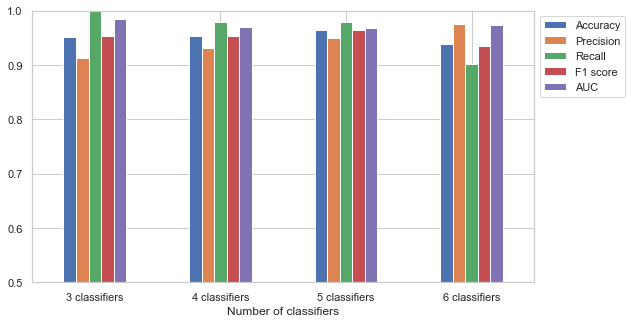

In [22]:
ax = resultsDF.plot.bar(rot=0)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0.5, 1)

### <font color='purple'> Bar Chart for best Pool

In [23]:
des_5_models_results.drop(['accuracy_std', 'precision_std', 'recall_std', 'f1_std', 'auc_std'], axis=1, inplace=True)

In [24]:
des_5_models_results.rename(columns={"accuracy": "Accuracy", "precision": "Precision", 
                          "recall":"Recall", "f1_score": "F1", "auc": "AUC"}, inplace=True)

In [25]:
des_5_models_results

,method,Accuracy,Precision,Recall,F1,AUC
0,FIRE-KNORA-U,0.971,0.945,1.000,0.972,0.992
1,KNORA-U,0.967,0.938,1.000,0.968,0.992
2,FIRE-KNORA-E,0.940,0.964,0.914,0.938,0.908
3,KNORA-E,0.942,0.969,0.914,0.941,0.908
4,FIRE-METADES,0.957,0.931,0.987,0.958,0.982
5,METADES,0.942,0.942,0.941,0.941,0.978
6,FIRE-DESKNN,0.987,0.975,1.000,0.988,0.992
7,DESKNN,0.986,0.973,1.000,0.987,0.991
10,FIRE-DESP,0.976,0.954,1.000,0.976,0.990
11,DESP,0.973,0.949,1.000,0.974,0.991


In [26]:
des_5_models_results.set_index('method',inplace=True)

In [27]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")

(0.0, 1.0)

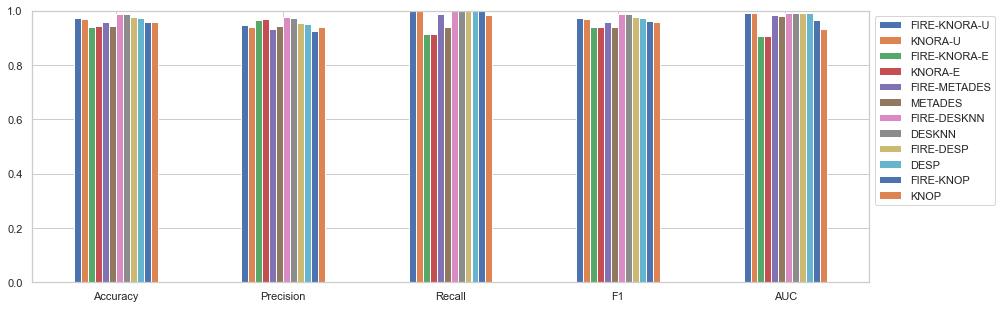

In [28]:
ax = des_5_models_results.T.plot.bar(rot=0, legend=True)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0.0, 1)

### <font color='purple'> ROC Curve 

In [29]:
def remove_rows(df): 
    indexNames = df[(df['models'] == 'FIRE-MCB') | (df['models'] == 'MCB')].index
    df.drop(indexNames , inplace=True)
    return df 

In [30]:
results_ROC = pd.read_csv("single_pool_results/des_single_pool_results_5_table_for_ROC.csv")

In [31]:
results_ROC = remove_rows(results_ROC)

In [32]:
results_ROC.set_index('models', inplace=True)

In [33]:
results_ROC

,auc,fpr,tpr
models,,,
FIRE-KNORA-U,0.992,[0. 0.00107875 0.00107875 0.00107875 0...,[0. 0. 0.07011866 0.14239482 0...
KNORA-U,0.992,[0. 0. 0.00107875 0.00107875 0...,[0. 0.06580367 0.06580367 0.13592233 0...
FIRE-KNORA-E,0.908,[0. 0.00107875 0.0021575 0.0021575 0...,[0. 0. 0. 0.07011866 0...
KNORA-E,0.908,[0. 0.00107875 0.0021575 0.0021575 0...,[0. 0. 0. 0.07011866 0...
FIRE-METADES,0.982,[0. 0.00107875 0.00107875 0.00107875 0...,[0. 0. 0.07011866 0.14239482 0...
METADES,0.978,[0. 0.00107875 0.00107875 0.00107875 0...,[0. 0. 0.07011866 0.14239482 0...
FIRE-DESKNN,0.992,[0. 0. 0.0021575 0.0021575 0...,[0. 0.06580367 0.06580367 0.13592233 0...
DESKNN,0.991,[0. 0. 0.0021575 0.0021575 0...,[0. 0.06580367 0.06580367 0.13592233 0...
FIRE-DESP,0.990,[0. 0.00107875 0.00107875 0.00107875 0...,[0. 0. 0.07011866 0.14239482 0...


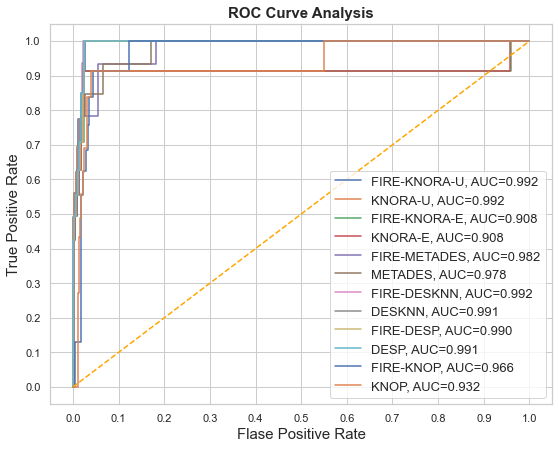

In [34]:
fig = plt.figure(figsize=(9,7))
sns.set_style("whitegrid")

for i in results_ROC.index:    
    plt.plot(ast.literal_eval(re.sub("\s+", ",", results_ROC.loc[i]['fpr'].strip())),
             ast.literal_eval(re.sub("\s+", ",", results_ROC.loc[i]['tpr'].strip())), 
             label="{}, AUC={:.3f}".format(i, results_ROC.loc[i]['auc']))
    
    

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## <font color='purple'>Critical Diagram 

In [35]:
def remove_rows(df): 
    indexNames = df[(df['models'] == 'FIRE-MCB') | (df['models'] == 'MCB')].index
    df.drop(indexNames , inplace=True)
    return df

In [36]:
results_CD = pd.read_csv("single_pool_results/des_single_pool_results_5_extend_for_CD.csv")

In [37]:
results_CD = remove_rows(results_CD)
results_CD

,models,accuracy
0,FIRE-KNORA-U,"[0.9714131607335491, 0.9719525350593312, 0.970..."
1,KNORA-U,"[0.9687162891046386, 0.9681769147788565, 0.966..."
2,FIRE-KNORA-E,"[0.9401294498381877, 0.9401294498381877, 0.940..."
3,KNORA-E,"[0.9422869471413161, 0.9422869471413161, 0.942..."
4,FIRE-METADES,"[0.9617044228694714, 0.9622437971952535, 0.962..."
5,METADES,"[0.970873786407767, 0.935814455231931, 0.93635..."
6,FIRE-DESKNN,"[0.9875943905070119, 0.9875943905070119, 0.987..."
7,DESKNN,"[0.9865156418554477, 0.9865156418554477, 0.986..."
10,FIRE-DESP,"[0.9762675296655879, 0.97680690399137, 0.97572..."
11,DESP,"[0.9741100323624595, 0.9735706580366774, 0.974..."


In [38]:
def compare_results(results, lst_models):      
        fried_result = friedmanchisquare(*results)
        
        ranks = np.array([rankdata(-p) for p in results])
        
        # Calculating the average ranks.
        average_ranks = np.mean(ranks, axis=0)

        names = [lst_models[i] + ' - ' + str(round(average_ranks[i], 3)) for i in range(len(average_ranks))]
        
        # This method computes the critical difference for Nemenyi test with alpha=0.1.
        # For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
        cd = compute_CD(average_ranks, n=len(results),alpha='0.05', test='nemenyi')
        
        return fried_result, ranks, names, cd , average_ranks

In [39]:
def plot_comparisons(fried_result, names, cd, average_ranks):    
    # This method generates the plot.
    graph_ranks(average_ranks, names=names,
                        cd=cd, width=10, textspace=1.5)
        
    plt.title(f'Friedman-Nemenyi={round(fried_result.pvalue, 4)}\nCD={round(cd, 3)}')
    plt.show()
    
    return

In [40]:
names = ["FIRE-KNORA-U", "KNORA-U", "FIRE-KNORA-E", "KNORA-E", "FIRE-METADES", "METADES",
         "FIRE-DESKNN", "DESKNN", "FIRE-DESP", "DESP", "FIRE-KNOP", "KNOP"]

dct_results = {}

for n in names:
    res = ast.literal_eval(results_CD[results_CD.models == n].accuracy.to_list()[0])
    dct_results[n] = res

In [41]:
results = np.c_[dct_results['FIRE-KNORA-U'], dct_results['KNORA-U'], dct_results['FIRE-KNORA-E'], 
                dct_results['KNORA-E'], dct_results['FIRE-METADES'], dct_results['METADES'], 
                dct_results['FIRE-DESKNN'], dct_results['DESKNN'], dct_results['FIRE-DESP'], 
                dct_results['DESP'], dct_results['FIRE-KNOP'], dct_results['KNOP']]

fried_result, ranks, names, cd, average_ranks = compare_results(results, names)

In [43]:
def plot_comparisons(fried_result, names, cd, average_ranks):    
    # This method generates the plot.
    graph_ranks(average_ranks, names=names,
                        cd=cd, width=10, textspace=1.5)
        
    plt.title(f'Friedman-Nemenyi < 0.001 \nCD={round(cd, 3)}')
    plt.show()
    
    return

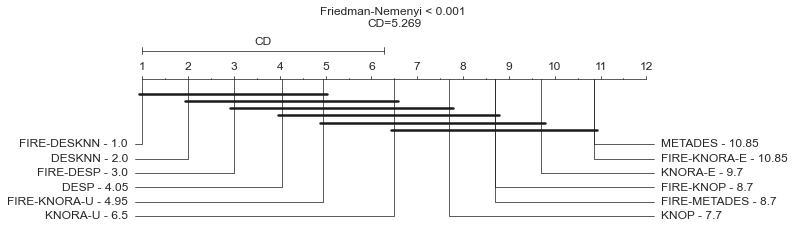

In [44]:
plot_comparisons(fried_result, names, cd, average_ranks)